Jan 2023
@author: hezya

https://en.m.wikipedia.org/wiki/Voigt_profile
http://journals.iucr.org/j/issues/1997/04/00/gl0484/gl0484.pdf
http://journals.iucr.org/j/issues/2000/06/00/nt0146/nt0146.pdf
https://www.onlinelibrary.wiley.com/doi/epdf/10.1002/sia.5521

In [1]:
import numpy as np
from scipy.stats import norm
from scipy.stats import cauchy
from scipy.special import wofz
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

In [2]:
def lorentz(x, fwhm):
    # Normalized Lorentzian 
    gamma = fwhm/2
    return cauchy.pdf(x/gamma) / gamma
    #equivalent to: return (gamma/np.pi) / (np.square(x) + np.square(gamma))

In [3]:
def gauss(x, fwhm):
    # Normalised Gaussian
    sigma = fwhm/(2*np.sqrt(2*np.log(2)))
    return norm.pdf(x, 0, sigma)
    #equivalent to: return (1/np.sqrt(2*np.pi)/sigma) * np.exp(- x**2 / (2* sigma**2))

In [10]:
def mix_functions(f1, f2, n):
    # mixing two fuctions
    return n * f1 + (1-n) * f2

In [13]:
def pseudo_voigt (x, fwhm, n):
    return mix_functions(x, lorentz(x, fwhm), gauss(x, fwhm))

In [6]:
def voigt(x, fwhm_l, fwhm_g):
    # Normalized Voigt
    gamma = fwhm_l
    sigma = fwhm_g / 2*np.sqrt(2*np.log(2))
    z = (x + 1j*gamma)/np.sqrt(2)/sigma
    return np.real(wofz(z))/np.sqrt(2*np.pi)/sigma
    # normolized Voigt (integral = 1): c * np.real(wofz((x + 1j*gamma)/(sigma * np.sqrt(2)))) / (sigma * np.sqrt(2*np.pi))
    # for Lorentz sigma=0, gamma=1, c=1
    # for Gauss sigma=1, gamma=0, c=1

In [14]:
x = np.arange (-3, 3 , 1e-2)
xfit = np.arange (-3, 3 , 0.01)

w = 1.0
yL = lorentz(x, w)
yG = gauss(x, w)
yPV = pseudo_voigt(x, w, 0.5)
yV = voigt(x, 0.2196199, 0.53439917)

In [15]:
dL = 0.05
dG = 0.05
wL, wG = np.mgrid[dL:10+dL:dL, dG:10+dG:dG]
yo = voigt(2, wL, wG)

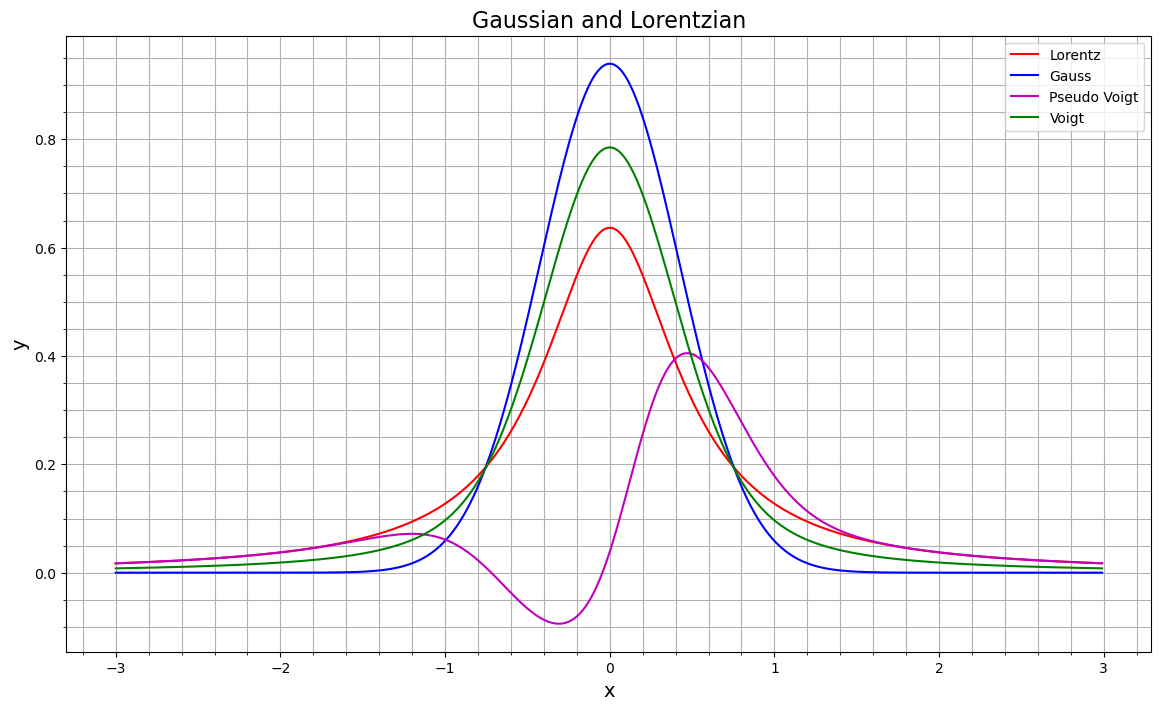

In [16]:
#mpl.style.use('default')
plt.close('all')
fig1, ax = plt.subplots(figsize=(14, 8))
ax.grid(visible=True, which='both', axis='both')
ax.minorticks_on()
ax.set_title("Gaussian and Lorentzian", fontsize=16)
ax.set_xlabel("x", fontsize=14)
#ax.set_xlim()
ax.set_ylabel("y", fontsize=14)
#ax.set_ylim()
ax.plot(x,yL, '-r', label='Lorentz')
ax.plot(x,yG, '-b', label='Gauss')
ax.plot(x,yPV, '-m', label='Pseudo Voigt')
ax.plot(x,yV, '-g', label='Voigt')
ax.legend()
